In [15]:
import pandas as pd
import csv
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/driving_log.csv', header=None)

In [50]:
lines = []

with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = './data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    images.append(cv2.flip(image,1))
    measurement = float(line[3])
    measurements.append(measurement)
    measurements.append(measurement*-1.0)
    
X_train = np.array(images)
y_train = np.array(measurements)

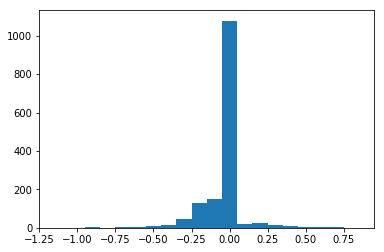

In [49]:
plt.hist(y_train, bins=np.arange(-1.05,1.05,0.1)-0.1)
plt.show()

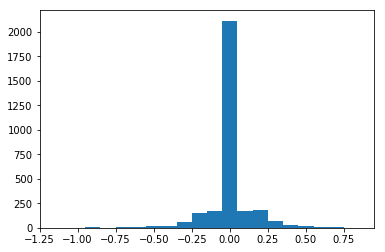

In [51]:
plt.hist(y_train, bins=np.arange(-1.05,1.05,0.1)-0.1)
plt.show()

In [54]:
images = []
measurements = []

for line in lines:
	source_path_center = line[0]
	source_path_left = line[1] 
	source_path_right = line[2]
	filename_center = source_path_center.split('/')[-1]
	filename_left = source_path_left.split('/')[-1]
	filename_right = source_path_right.split('/')[-1]

	current_path_center = './data/IMG/' + filename_center
	current_path_left = './data/IMG/' + filename_left
	current_path_right = './data/IMG/' + filename_right

	correction = 0.2
	measurement_center = float(line[3])
	measurement_left = measurement_center + correction
	measurement_right = measurement_center - correction

	image_center = cv2.imread(current_path_center)
	image_left = cv2.imread(current_path_left)
	image_right = cv2.imread(current_path_right)

	images.append(image_center)
	images.append(image_left)
	images.append(image_right)

	measurements.append(measurement_center)
	measurements.append(measurement_left)
	measurements.append(measurement_right)

	images.append(cv2.flip(image_center,1))
	images.append(cv2.flip(image_left,1))
	images.append(cv2.flip(image_right,1))

	measurements.append(measurement_center * -1)
	measurements.append(measurement_left * -1)
	measurements.append(measurement_right * -1)

In [55]:
X_train = np.array(images)
y_train = np.array(measurements)

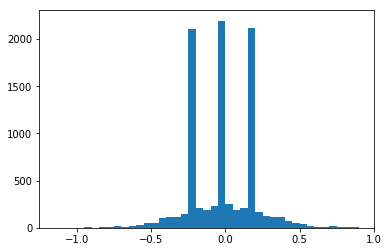

In [57]:
plt.hist(y_train, bins=np.arange(-1.05,1.05,0.05)-0.1)
plt.show()